In [1]:
%matplotlib inline

作为对比，先使用numpy
-------------------
本小节设计一个完全连接的ReLU网络，具有一个隐藏层，没有偏差，使用平方损失函数，训练由x预测y；

整个实现使用numpy手动计算正向传递、损失和反向传递；

numpy数组是一个通用的n维数组，并没有专门针对深度学习、梯度或计算图设计，只是一种执行通用数值计算的方法。



In [4]:
import numpy as np
import matplotlib.pyplot as plt

# N是批量大小，D_in是输入维度;
# H是隐藏层维度，D_out是输出维度。

N, D_in, H, D_out = 64, 1000, 100, 10

# 创建随机输入和输出数据
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# 随机初始化权重
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6

#创建图并命名
plt.figure('Loss')


iter_plot = []
loss_plot = []

for t in range(500):
    # 前向传播: 计算预测y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # 计算和打印loss
    loss = np.square(y_pred - y).sum()
    
    
    print(t, loss)
    
    iter_plot.append(t)
    loss_plot.append(loss.item())

    # 反传计算损失对于w1和w2的梯度
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # 更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2


0 34360456.12166848
1 34854837.01606804
2 41236085.476172835
3 45367318.60656506
4 39705182.68607144
5 25157955.680282824
6 11987174.559637446
7 5125327.396681846
8 2486901.5366168534
9 1519190.6787039568
10 1112091.5950382925
11 894000.4689329956
12 749236.6301865007
13 640225.9805177064
14 553052.1464988469
15 481256.74040746875
16 421313.79466742184
17 370818.92853161896
18 327936.0072124817
19 291221.57424172503
20 259578.80100512915
21 232209.77850538772
22 208365.96348236647
23 187524.63404285104
24 169231.4318405424
25 153093.70870314568
26 138816.23954299508
27 126150.70999279359
28 114878.91042624331
29 104803.38378112858
30 95784.21345615255
31 87681.76107992984
32 80391.0980364205
33 73814.45700055879
34 67867.72262198085
35 62481.52232193191
36 57598.92984585355
37 53161.474679599436
38 49126.22768834818
39 45445.158641671005
40 42079.91039433949
41 38999.4154919045
42 36176.39595107248
43 33586.837386875166
44 31207.040402586405
45 29019.524393934593
46 27004.27025632564
4

381 0.007039113443660452
382 0.006774422213529325
383 0.006519770999773725
384 0.006274672457448764
385 0.006038998719605993
386 0.005812122076564645
387 0.005593800925456504
388 0.005383754421705589
389 0.005181641808703084
390 0.004987167636140896
391 0.004799978380976316
392 0.004619978888258575
393 0.0044466689159333205
394 0.0042798882010510846
395 0.004119395598846975
396 0.0039649620563724595
397 0.003816376893659001
398 0.0036733448749443993
399 0.00353580062852022
400 0.00340333263282725
401 0.003275890435754037
402 0.003153229937291867
403 0.0030351777270301774
404 0.002921595562669735
405 0.002812265348382831
406 0.0027071128879600165
407 0.0026058218674787107
408 0.0025083593991187666
409 0.002414542224591117
410 0.0023242606598853385
411 0.0022373806375771297
412 0.002153758365947267
413 0.002073315051903925
414 0.0019958458613264663
415 0.0019212841002483878
416 0.0018495063670019361
417 0.0017804428934521397
418 0.0017139599354776985
419 0.0016499948766679107
420 0.00158

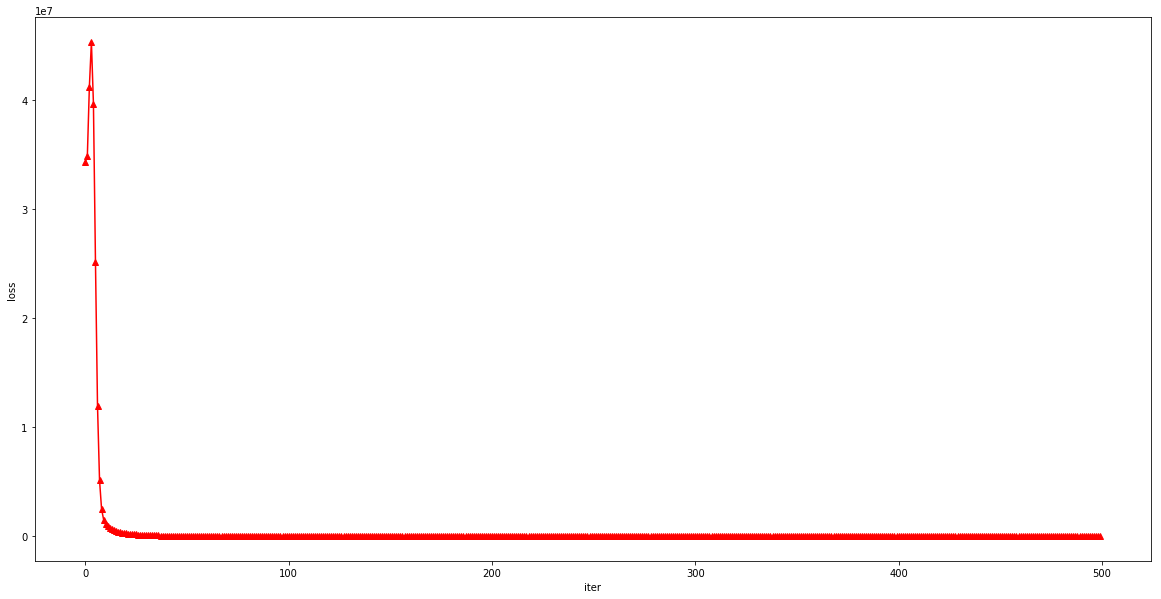

In [5]:
plt.figure(figsize=(20,10))
ax = plt.subplot()
# 设置x轴、y轴名称
ax.set_xlabel('iter')
ax.set_ylabel('loss')
# 绘制连线图
plt.plot(iter_plot,loss_plot,marker='^',linestyle='-',color='r')
plt.show()